# Final Homework

- **Course:** Data Mining
- **Author:** Enes Kemal Ergin


Using Pokemon Dataset from Kaggle: [Link](https://www.kaggle.com/abcsds/pokemon)

#### About Dataset:

> This dataset contains a full set of in-game statistics for all 802 pokemon in the Sun and Moon. It also includes full information on which pokemon can learn which moves (movesets.csv), what moves can do (moves.csv), and how damage is modified by pokemon type (type-chart.csv). But for this project I am going to ignore them.
    
 - **id:** unique id for each pokemon species
 - **forme:** used to differentiate different forms of a single pokemon species
 - **type1:** the first type of this pokemon
 - **type2:** the secondary type of this pokemon (if it has one)
 - **hp:** hit points, or health, defines how much damage a pokemon can withstand before fainting
 - **attack:**  the base modifier for physical attacks
 - **defense:** the base damage resistance against physical attacks
 - **spattack:** special attack, the base modifier for special attacks
 - **spdefense:** the base damage resistance against special attacks
 - **speed:** used in determining which pokemon attacks first each round
 - **total:** the sum of hp, attack, defense, spattack, spdefense, and speed

#### Columns to ignore:

 - **ndex:** the pokedex number for this pokemon
 - **species:** the name of this pokemon
 - **ability1:** the first ability this pokemon could have
 - **ability2:** the second ability this pokemon could have
 - **abilityH:** the hidden ability this pokemon could have instead of ability1 or ability2
 - **weight:** the pokemon's weight in lbs
 - **height:** the pokemon's height in feet and inches
 - **dex1:** first pokedex description of this pokemon
 - **dex2:** second pokedex description of this pokemon
 - **class:** the thematic class of pokemon this species is (does not influence game mechanics)
 - **percent-male:** the percentage of pokemon of this species which are male
 - **percent-female:** the percentage of pokemon of this species which are female
 - **pre-evolution:** the pokemon that evolves into this pokemon
 - **egg-group1:** a pokemon can breed with any other pokemon in the same egg group
 - **egg-group2:** a pokemon can breed with any other pokemon in the same egg group

Step 0 : Data Preparation
---

Reading and cleaning the data if necessary

In [1]:
# Import the pandas library 
import pandas as pd

In [2]:
# Read csv file from the path and store it in df
df = pd.read_csv('./eneskemal_HW.csv', encoding="ISO-8859-1",
                 usecols=[3,4,5,9,10,11,12,13,14,15]) # Specific columns to use
# Show the first 5 row of the data
df.head() 
# Show the last 5 row of the data
# df.tail()

,forme,type1,type2,hp,attack,defense,spattack,spdefense,speed,total
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,405
2,Venusaur,Grass,Poison,80,82,83,100,100,80,525
3,Charmander,Fire,NaN,39,52,43,60,50,65,309
4,Charmeleon,Fire,NaN,58,64,58,80,65,80,405


In [3]:
# Check if missing values
df.count(0) 

forme        1061
type1        1061
type2         538
hp           1061
attack       1061
defense      1061
spattack     1061
spdefense    1061
speed        1061
total        1061
dtype: int64

Step 1: Data Information
---

Generate the information about your dataset: number of columns and rows, names and data types of the columns, memory usage of the dataset. 

> *Hint: Pandas data frame info() function.*

In [4]:
# Show the general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 10 columns):
forme        1061 non-null object
type1        1061 non-null object
type2        538 non-null object
hp           1061 non-null int64
attack       1061 non-null int64
defense      1061 non-null int64
spattack     1061 non-null int64
spdefense    1061 non-null int64
speed        1061 non-null int64
total        1061 non-null int64
dtypes: int64(7), object(3)
memory usage: 83.0+ KB


Step 2 : Descriptive Statistics
---

Generate descriptive statistics of all columns (input and output) of your dataset. Descriptive statistics for numerical columns include: count, mean, std, min, 25 percentile (Q1), 50 percentile (Q2, median), 75 percentile (Q3), max values of the columns. For categorical columns, determine distinct values and their frequency in each categorical column. 

> *Hint: Pandas, data frame describe() function.*

In [5]:
# Descriptive information of the numerical columns
df.describe()

,hp,attack,defense,spattack,spdefense,speed,total
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,70.041470,79.602262,73.730443,74.550424,72.911404,70.321395,441.157399
std,25.893508,31.378369,30.394899,31.975146,27.995681,29.328288,121.289505
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000,48.000000,336.000000
50%,68.000000,75.000000,70.000000,70.000000,70.000000,68.000000,455.000000
75%,80.000000,100.000000,91.000000,95.000000,90.000000,93.000000,520.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,780.000000


In [6]:
# Categorical descriptive info for Type1 column
df['type1'].describe()

count      1061
unique       18
top       Water
freq        130
Name: type1, dtype: object

In [7]:
# Categorical descriptive info for Type2 column
df['type2'].describe()

count        538
unique        18
top       Flying
freq         140
Name: type2, dtype: object

Step 3 : Analysis of the Output Column
---

If the output column is numerical then calculate the IQR (inter quartile range, Q3-Q1) and Range (difference between max and min value). If your output column is categorical then determine if the column is nominal or ordinal, why?. Is there a class imbalance problem? (check if there is big difference between the number of distinct values in your categorical output column)


In [8]:
df['total'].describe()

count    1061.000000
mean      441.157399
std       121.289505
min       175.000000
25%       336.000000
50%       455.000000
75%       520.000000
max       780.000000
Name: total, dtype: float64

In [9]:
# I want to just analyze the data but let's say my output
#  is total column in this case:
tot_info = df['total'].describe()
print("(IQR)-Interquartile Range: ", tot_info['75%'] - tot_info['25%'])
print("Range:", tot_info['max'] - tot_info['min'])

(IQR)-Interquartile Range:  184.0
Range: 605.0


__Notes:__ Output column is numerical data.

Step 4 : Box Plots
---

Generate box plots of all numerical columns and generate pie plots for all categorical columns. 

> *Hint: Pandas, Matplotlib, Seaborn, Bokeh libraries*

In [10]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
# Seaborn configurations
sns.set(style="whitegrid", color_codes=True)
sns.set_style("ticks")

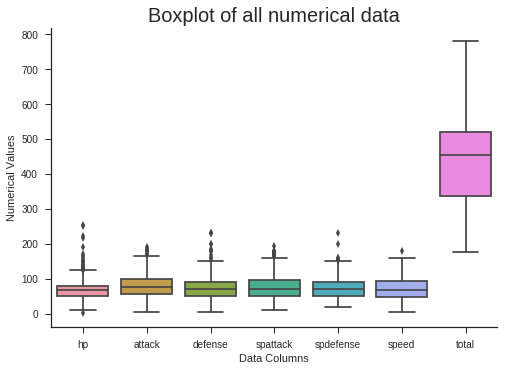

In [11]:
# Plotting all the numerical columns to combined boxplot
sns.boxplot(data=df[(list(range(10))[3:])]) 
plt.title("Boxplot of all numerical data", fontsize=20)
plt.ylabel("Numerical Values")
plt.xlabel("Data Columns")
sns.despine() 
plt.show()

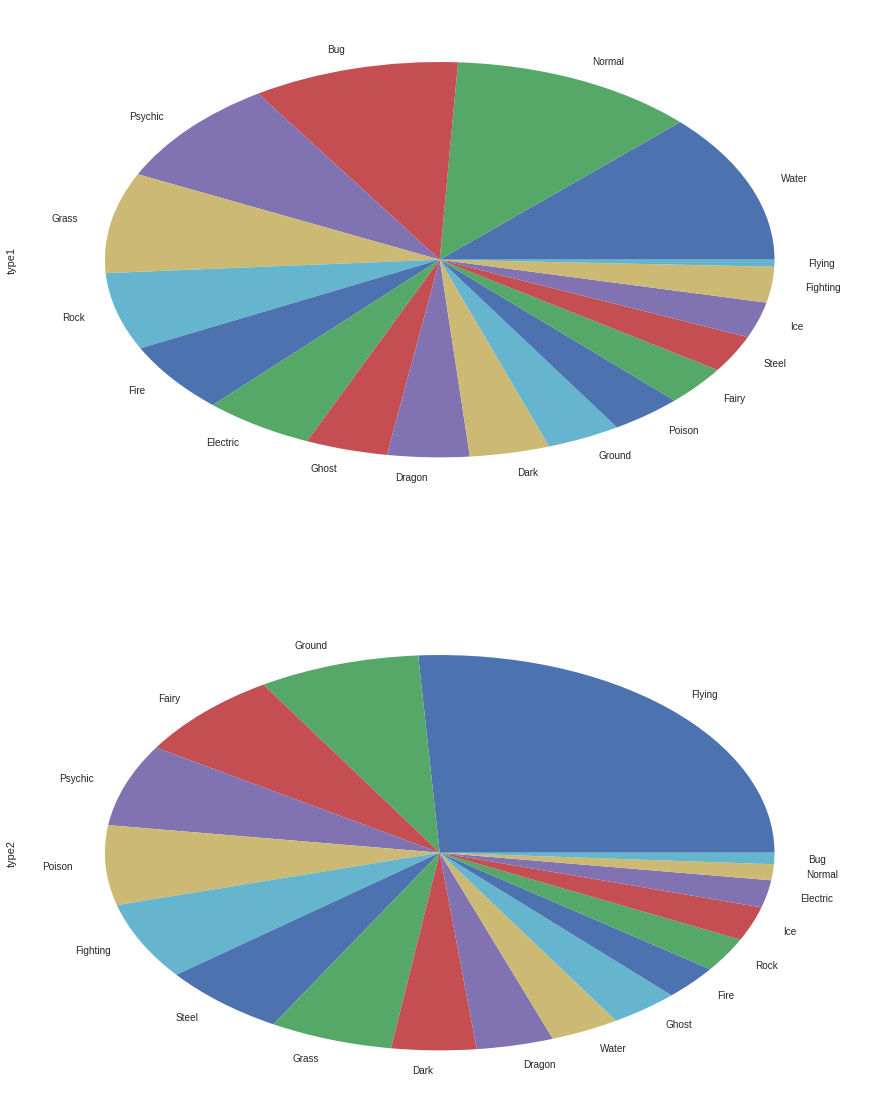

In [13]:
# Plotting categorical type 1 and type2 data to pie plot
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(211)
df['type1'].value_counts().plot(kind='pie')
ax2 = fig.add_subplot(212)
df['type2'].value_counts().plot(kind='pie')
plt.show()

Step 5 : Distribution of Columns
---

Generate plots for probability density function (pdf) or histogram of all numerical input and output columns. 

> *Hint: Pandas, Matplotlib, Seaborn, Bokeh libraries*


In [14]:
# Defining a function to use 8 times
def dist_hist_plot(name):
    sns.distplot(df[name])
    plt.title((name+" points distribution"), fontsize=20)
    plt.show()

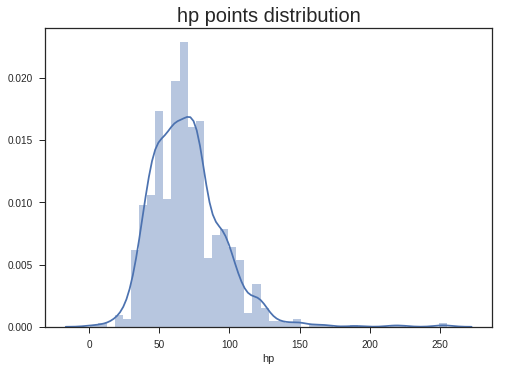

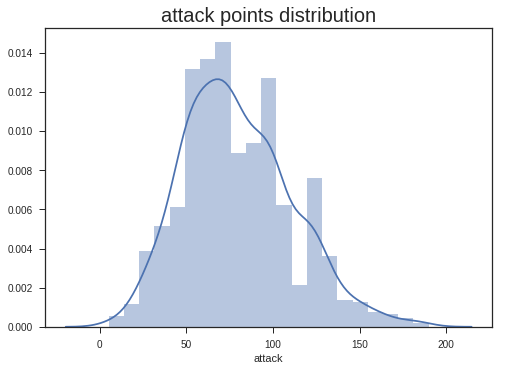

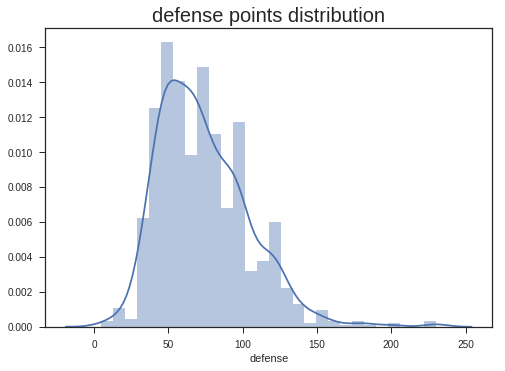

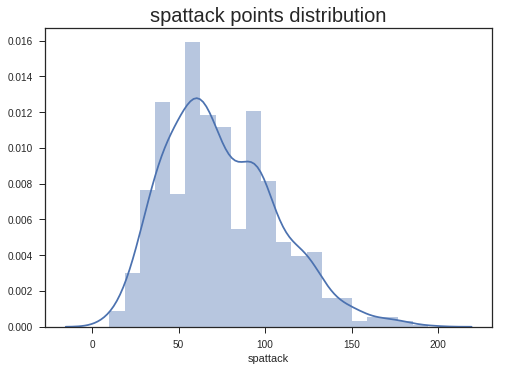

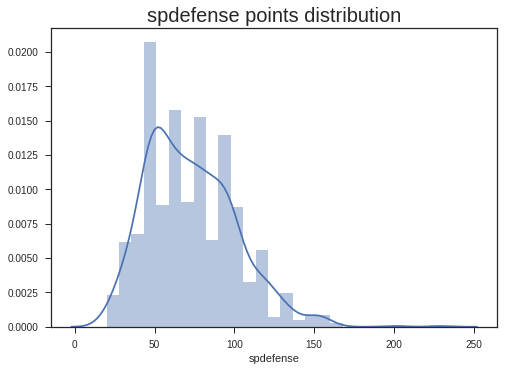

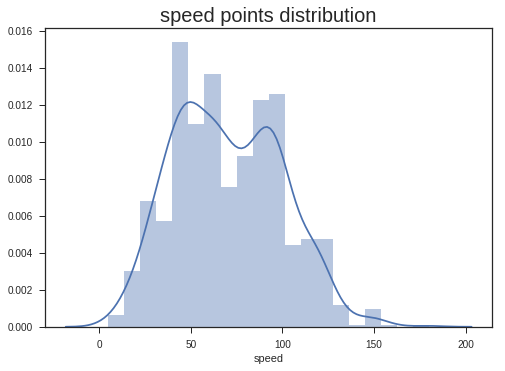

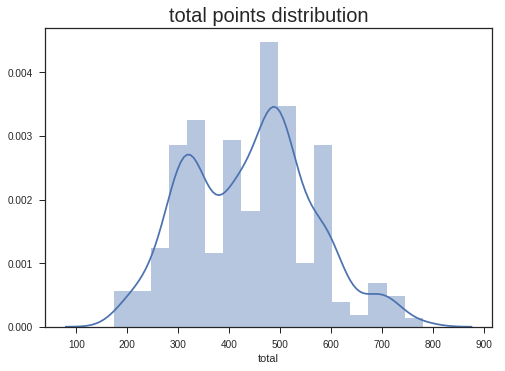

In [15]:
lst_names = ["hp","attack","defense","spattack","spdefense","speed","total"]
# Plotting distribution for all numerical columns
for name in lst_names:
    dist_hist_plot(name)

Step 6 : Pairwise Plot
---

Generate pairwise scatter plot of all numerical input and output columns. *Hint: Seaborn pairwise plot function*


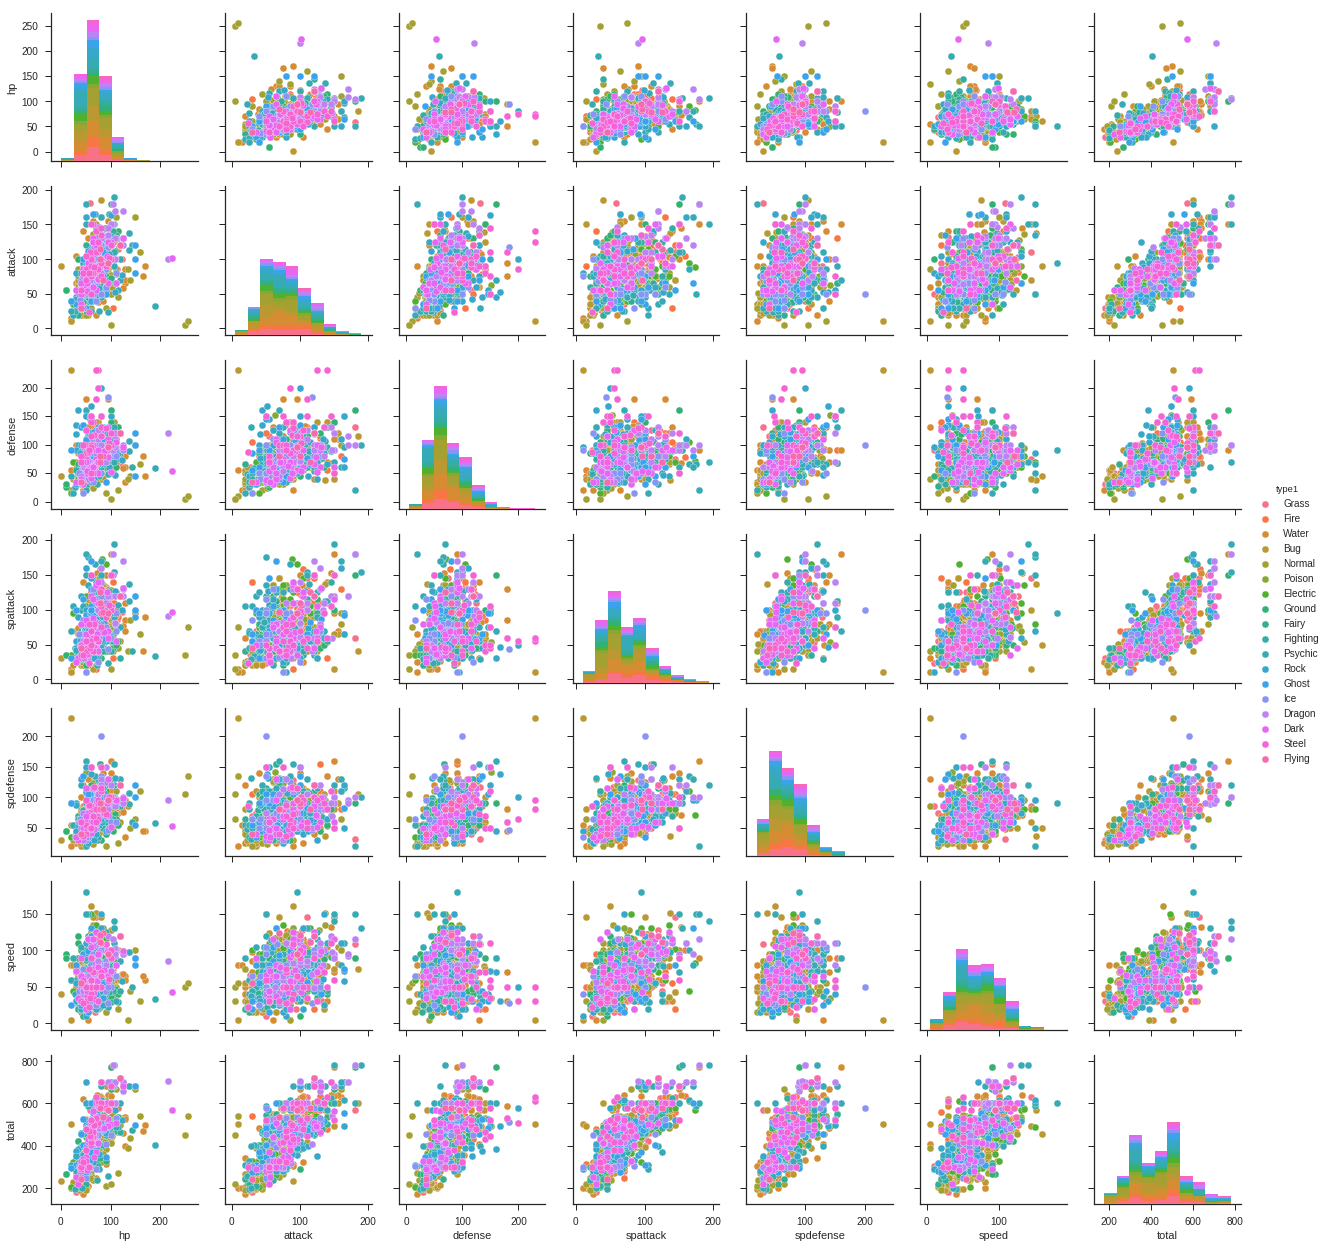

In [16]:
# num_df = df[(list(range(10))[3:])] # Selecting numerical data only
# pairwising with type1 categorical data
sns.pairplot(df, hue="type1", palette="husl")
plt.show()

Step 7 :  Cross-Correlation of Input Columns
---

Generate the cross-correlation matrix for input columns. Use pearson correlation coefficient. 

> *Hint: Pandas Seaborn corr() function*


In [17]:
df.corr()

,hp,attack,defense,spattack,spdefense,speed,total
hp,1.000000,0.444764,0.308623,0.405636,0.409281,0.230426,0.663013
attack,0.444764,1.000000,0.472564,0.398984,0.281151,0.386692,0.735661
defense,0.308623,0.472564,1.000000,0.250037,0.548948,0.046982,0.642723
spattack,0.405636,0.398984,0.250037,1.000000,0.505796,0.479303,0.748746
spdefense,0.409281,0.281151,0.548948,0.505796,1.000000,0.259481,0.724578
speed,0.230426,0.386692,0.046982,0.479303,0.259481,1.000000,0.589060
total,0.663013,0.735661,0.642723,0.748746,0.724578,0.589060,1.000000


Step 8 : Identify Correlated Columns
---

Those input columns with pearson coefficient greater than or equal to 0.8 *Hint: Pandas, Seaborn corr() function*

In [20]:
df.corr() > 0.8 
# As you can see not really useful data which gives me 
#  not useful correlations

,hp,attack,defense,spattack,spdefense,speed,total
hp,True,False,False,False,False,False,False
attack,False,True,False,False,False,False,False
defense,False,False,True,False,False,False,False
spattack,False,False,False,True,False,False,False
spdefense,False,False,False,False,True,False,False
speed,False,False,False,False,False,True,False
total,False,False,False,False,False,False,True


Step 9 : Cross-Correlation Heatmap
---

Generate heatmap plot for cross-correlation matrix of input columns. 

> *Hint: Pandas, Seaborn heatmap() function*

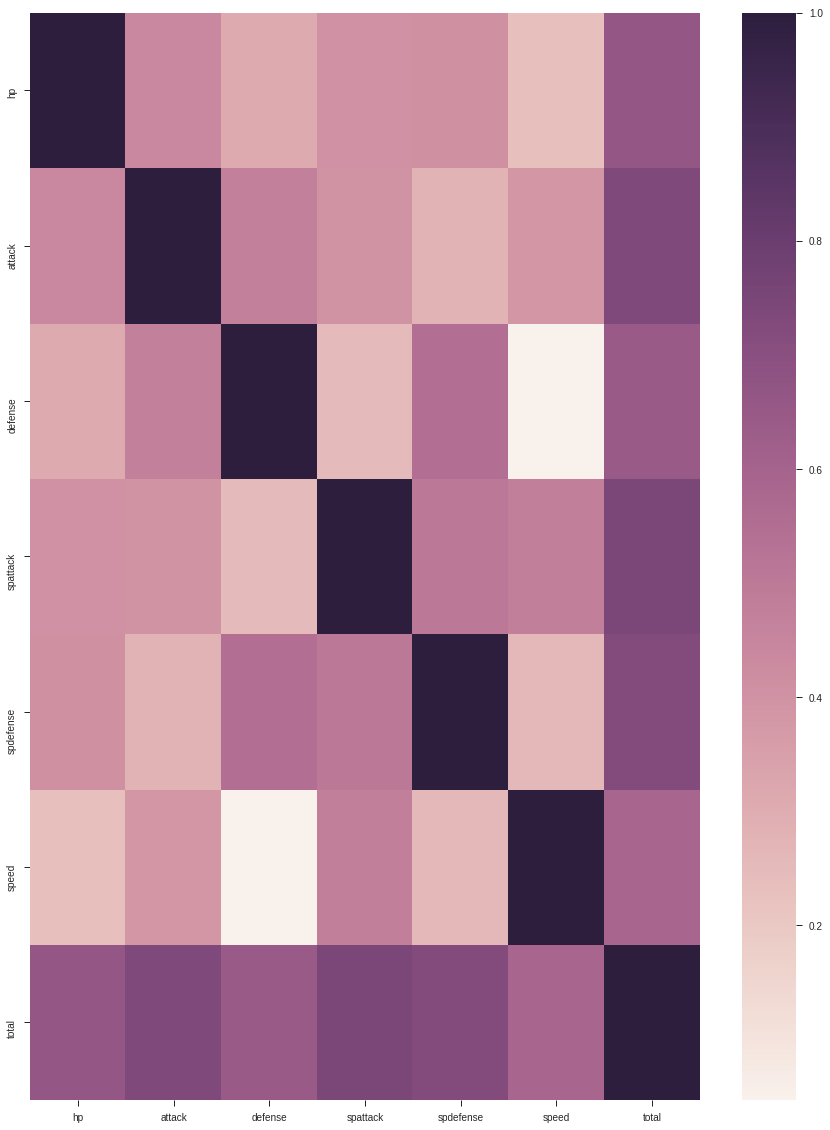

In [21]:
fig = plt.figure(figsize=(15,20))
cor = df.corr()
sns.heatmap(cor)
plt.show()

Step 10 : Output versus Input Plot
---

Select one of the numerical input columns in your dataset, and generate scatter plot of output column versus the input column. If the output column is categorical then generate the box plot of the input column for each distinct value of the output column. Let’s say if your output has three distinct categorical values, plot one box plot of the input column for each value (three) in the output column. 

> *Hint: check examples in Pandas, Matplotlib, plot(), scatter(), groupby() getgroup() functions*


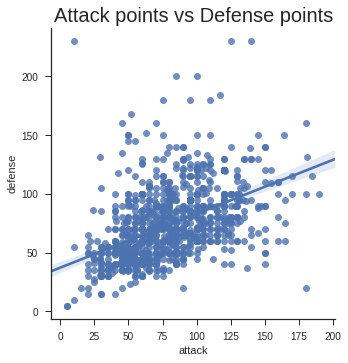

In [22]:
sns.lmplot(x='attack', y='defense', data=df)
plt.title("Attack points vs Defense points", fontsize=20)
plt.show()